In [1]:
import numpy as np
import os
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import model
import evaluation
import preprocess
from collections import defaultdict
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown
import warnings
import tuning


warnings.filterwarnings("ignore")
%matplotlib inline

dict_best_estimators, dict_best_params, dict_scores = tuning.load_tuning_result()
X_train, X_test, y_train, y_test = preprocess.load_train_test()

In [4]:
# best scores
for name, tem in dict_scores.items():
    display(name)
    index = tem.test_score.argmax()
    display(index)
    display(tem.loc[index])

'DecisionTree'

'max_depth:5;sample_method:None;sample_ratio:0.25'

test_score     0.823585
train_score    0.858645
fit_time       0.062375
score_time     0.003170
Name: max_depth:5;sample_method:None;sample_ratio:0.25, dtype: float64

'SVM'

'C:1;kernel:rbf'

test_score     0.865553
train_score    0.878474
fit_time       5.291261
score_time     0.176287
Name: C:1;kernel:rbf, dtype: float64

'LR'

'C:1.0;balanced_learning:True;penalty:l1;sample_method:<function downsampling at 0x000001F5111A28C8>;sample_ratio:0.3333333333333333'

test_score     0.838488
train_score    0.858438
fit_time       0.018680
score_time     0.005003
Name: C:1.0;balanced_learning:True;penalty:l1;sample_method:<function downsampling at 0x000001F5111A28C8>;sample_ratio:0.3333333333333333, dtype: float64

'XGBoost'

'gamma:0.0;learning_rate:0.25;max_depth:100;min_child_weight:1;n_estimators:400'

test_score     0.890047
train_score    1.000000
fit_time       6.337639
score_time     0.028353
Name: gamma:0.0;learning_rate:0.25;max_depth:100;min_child_weight:1;n_estimators:400, dtype: float64

-----

**DecisionTree**

the recall for this model is : 0.888235294118


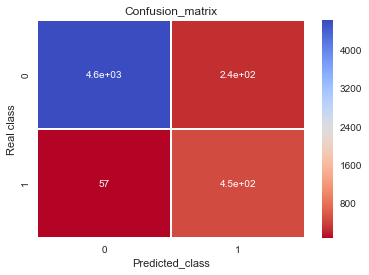


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      4860
          1       0.65      0.89      0.75       510

avg / total       0.96      0.94      0.95      5370



{'test': {'f1': 0.75374376039933433, 'roc_auc': 0.93713568143306702},
 'train': {'f1': 0.87114197530864201, 'roc_auc': 0.99857973960235058}}

-----

**SVM**

the recall for this model is : 0.894117647059


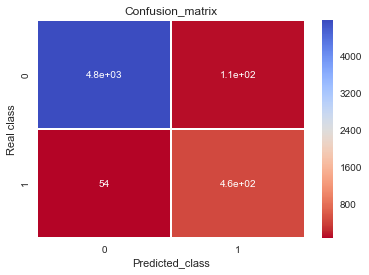


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      4860
          1       0.81      0.89      0.85       510

avg / total       0.97      0.97      0.97      5370



{'test': {'f1': 0.84995340167753963, 'roc_auc': 0.97884329863632702},
 'train': {'f1': 0.87526427061310774, 'roc_auc': 0.97808200508008447}}

-----

**LR**

the recall for this model is : 0.896078431373


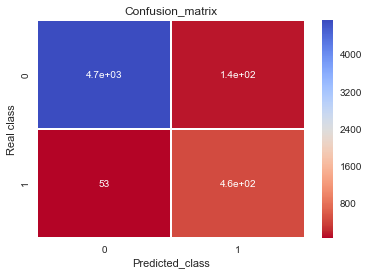


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      4860
          1       0.77      0.90      0.83       510

avg / total       0.97      0.96      0.97      5370



{'test': {'f1': 0.8294010889292196, 'roc_auc': 0.97607036230129907},
 'train': {'f1': 0.85407193054981401, 'roc_auc': 0.97693844603247504}}

-----

**XGBoost**

the recall for this model is : 0.850980392157


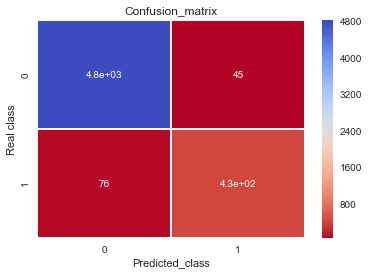


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4860
          1       0.91      0.85      0.88       510

avg / total       0.98      0.98      0.98      5370



{'test': {'f1': 0.8776541961577351, 'roc_auc': 0.97499193092875014},
 'train': {'f1': 0.99599822143174743, 'roc_auc': 0.99999704727568051}}

In [8]:
mds = []
for md_name, md in tuning.models.items():
    params = dict_best_params[md_name]
    display(Markdown("-----"))
    display(Markdown("**{}**".format(md_name)))
    scores = evaluation.estimate(md(**params), X_train, X_test, y_train, y_test, use_confusion_matrix=True)
    display(scores)